In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import date, time

try:
    import yfinance
except:
    !pip install -q yfinance
    import yfinance
    
try:
    import yahoofinancials
except:
    !pip install -q yahoofinancials
    import yahoofinancials
    
import yfinance as yf
from yahoofinancials import YahooFinancials
import datetime
import warnings

warnings.filterwarnings('ignore')

start_date = '2010-01-01'
end_date = datetime.date.today()

df = yf.download('NVDA', start=start_date, end=end_date, progress=False)




In [100]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,4.627500,4.655000,4.527500,4.622500,4.241151,80020400
2010-01-05,4.605000,4.740000,4.605000,4.690000,4.303081,72864800
2010-01-06,4.687500,4.730000,4.642500,4.720000,4.330606,64916800
2010-01-07,4.695000,4.715000,4.592500,4.627500,4.245739,54779200
2010-01-08,4.590000,4.670000,4.562500,4.637500,4.254913,47816800
...,...,...,...,...,...,...
2023-08-21,444.940002,470.649994,442.220001,469.670013,469.670013,69257300
2023-08-22,481.350006,481.869995,453.329987,456.679993,456.679993,75720700
2023-08-23,458.660004,472.000000,452.079987,471.160004,471.160004,77904600


In [101]:
import seaborn as sns
%matplotlib inline

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3435 entries, 2010-01-04 to 2023-08-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3435 non-null   float64
 1   High       3435 non-null   float64
 2   Low        3435 non-null   float64
 3   Close      3435 non-null   float64
 4   Adj Close  3435 non-null   float64
 5   Volume     3435 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 187.9 KB


<AxesSubplot:xlabel='Date', ylabel='Close'>

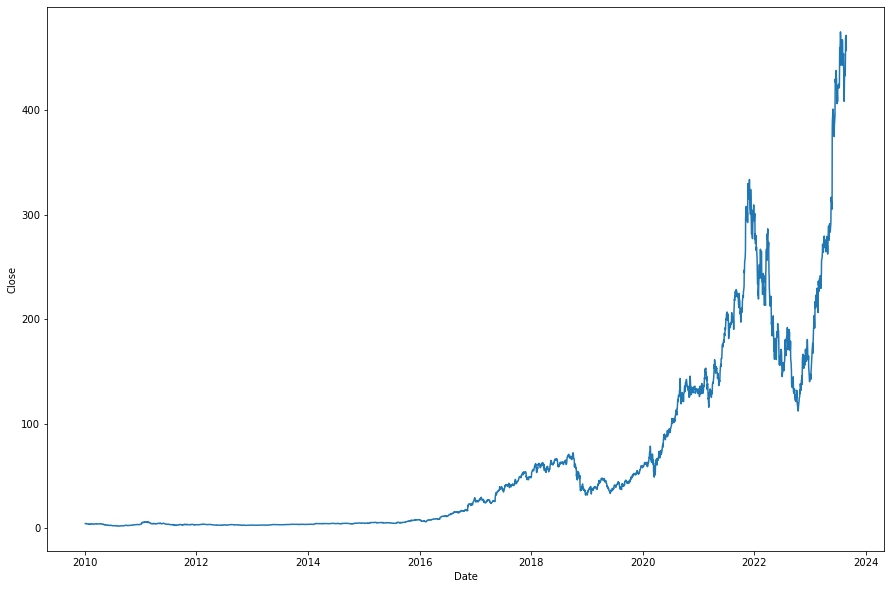

In [103]:
plt.figure(figsize=(15,10))
sns.lineplot(x='Date',y='Close',data=df)

In [104]:
try:
    import pandas_ta as ta
except:
    !pip install -q pandas_ta
    import pandas_ta as ta

In [105]:
df['RSI(2)']=ta.rsi(df['Close'],length=2)
df['RSI(7)']=ta.rsi(df['Close'],length=7)
df['RSI(14)']=ta.rsi(df['Close'],length=14)
df['CCI(30)']=ta.cci(close=df['Close'],length=30,high=df['High'],low=df['Low'])
df['CCI(50)']=ta.cci(close=df['Close'],length=50,high=df['High'],low=df['Low'])
df['CCI(100)']=ta.cci(close=df['Close'],length=100,high=df['High'],low=df['Low'])

In [106]:
df = df.dropna()

<AxesSubplot:xlabel='Date'>

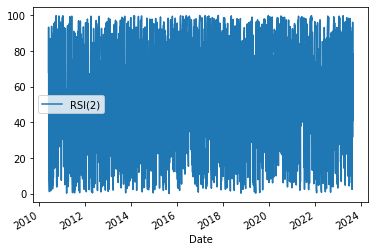

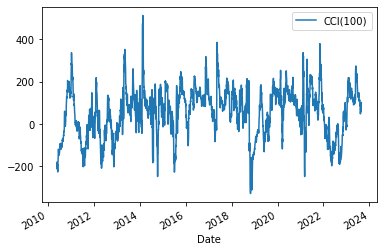

In [120]:
df.plot(y='RSI(2)')
df.plot(y='CCI(100)')

In [108]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,RSI(2),RSI(7),RSI(14),CCI(30),CCI(50),CCI(100)
Date,,,,,,,,,,,,
2010-05-26,3.3000,3.3625,3.1775,3.1875,2.924536,99502800,68.040922,36.609701,32.825099,-84.363878,-121.032465,-211.346882
2010-05-27,3.2675,3.3750,3.2600,3.3750,3.096568,71356000,93.399432,54.438149,42.662445,-63.445993,-99.622159,-181.159933
2010-05-28,3.3700,3.3700,3.2350,3.2850,3.013993,54511600,53.015787,47.030831,39.660166,-66.645320,-100.495886,-183.041542
2010-06-01,3.2400,3.2775,3.1425,3.1450,2.885542,52749200,22.606361,37.717008,35.477707,-81.740105,-111.432799,-199.269594
2010-06-02,3.1500,3.1850,3.1300,3.1800,2.917655,64908800,39.855569,41.118073,37.259075,-80.799572,-109.015929,-195.546897


In [109]:
import numpy as np

In [110]:
df['LABEL']= np.where( df['Open'].shift(-2).gt(df['Open'].shift(-1)),"1","0")
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,RSI(2),RSI(7),RSI(14),CCI(30),CCI(50),CCI(100),LABEL
Date,,,,,,,,,,,,,
2010-05-26,3.3000,3.3625,3.1775,3.1875,2.924536,99502800,68.040922,36.609701,32.825099,-84.363878,-121.032465,-211.346882,1
2010-05-27,3.2675,3.3750,3.2600,3.3750,3.096568,71356000,93.399432,54.438149,42.662445,-63.445993,-99.622159,-181.159933,0
2010-05-28,3.3700,3.3700,3.2350,3.2850,3.013993,54511600,53.015787,47.030831,39.660166,-66.645320,-100.495886,-183.041542,0
2010-06-01,3.2400,3.2775,3.1425,3.1450,2.885542,52749200,22.606361,37.717008,35.477707,-81.740105,-111.432799,-199.269594,0
2010-06-02,3.1500,3.1850,3.1300,3.1800,2.917655,64908800,39.855569,41.118073,37.259075,-80.799572,-109.015929,-195.546897,0


In [111]:
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [112]:
X = df[df.columns[6:-1]].values
y = df['LABEL'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [113]:
mlp = MLPClassifier(hidden_layer_sizes = (8,8,8), activation ='relu', solver='adam',max_iter=1000)


In [114]:
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [115]:
from sklearn.metrics import classification_report,confusion_matrix

In [116]:
print('Train Data Accuracy')
print(classification_report(y_train,predict_train))

Train Data Accuracy
              precision    recall  f1-score   support

           0       0.54      0.22      0.31      1132
           1       0.53      0.82      0.64      1203

    accuracy                           0.53      2335
   macro avg       0.53      0.52      0.48      2335
weighted avg       0.53      0.53      0.48      2335



In [117]:
print('Test Data Accuracy')
print(classification_report(y_test,predict_test))

Test Data Accuracy
              precision    recall  f1-score   support

           0       0.46      0.23      0.31       477
           1       0.52      0.76      0.62       524

    accuracy                           0.51      1001
   macro avg       0.49      0.49      0.46      1001
weighted avg       0.49      0.51      0.47      1001



### Backtesting our model

<AxesSubplot:xlabel='Date'>

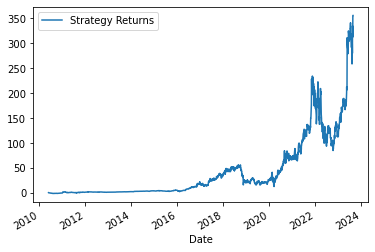

In [118]:
df['Prediction'] = np.append(predict_train,predict_test)
df['Strategy Returns'] = np.where( df['Prediction'].eq("1"),df['Open'].shift(-2)-df['Open'].shift(-1),0)

df['Strategy Returns'] = df['Strategy Returns'].cumsum()

df.plot(y = 'Strategy Returns')

In [119]:
prediction = df.iloc[-1]['Prediction']

if prediction =="1":
    print('Today up')
    
else:
    print('Today down')

Today up
